In [1]:
import numpy as npy, os, matplotlib.pyplot as plt

In [3]:
cd ../../ImageSets/

/home/tanmay/Research/Code/HierarchicalTaskRL/ImageSets


In [141]:
images = npy.load("Bordered_Images_50_genres_1540.npy")
images[images==-1]=0.

In [142]:
def infogain(y,a,l):
#     if a==1:
#         s1=y[:l,:]
#         s2=y[l:,:]        
#     if a==0:
#         s1=y[:,:l]
#         s2=y[:,l:]
    if a==0:
        s1=y[:l,:]
        s2=y[l:,:]        
    if a==1:
        s1=y[:,:l]
        s2=y[:,l:]

    ysize = y.shape[0]*y.shape[1]
    ps1 = float( s1.shape[0]*s1.shape[1])/ysize
    ps2 = float(s2.shape[0]*s2.shape[1])/ysize
    return entropy(y)-(ps1*entropy(s1)+ps2*entropy(s2))

In [143]:
def entropy(y):     
    nones = npy.count_nonzero(y)
    ysize = y.shape[0]*y.shape[1]    
    nzeros = ysize-nones
    pz = float(nzeros)/ysize
    po = float(nones)/ysize
    if pz==0 or po==0: 
        return 0.                
    return -(pz*npy.log2(pz)+po*npy.log2(po))  

In [157]:
def bestsplit(x):
    maxval = -1           
    chosen_a = -1                             
    chosen_l = -1                                       
    print("Shape of image:",x.shape)
    for a_val in range(2):         
        if a_val==0:
            limval = x.shape[0]-1
        if a_val==1:
            limval = x.shape[1]-1
        for l_val in range(1,limval):
            
            ig = infogain(x,a_val,l_val)   
            print(a_val,l_val,ig,limval, chosen_a,chosen_l, maxval)
            if ig>maxval:            
                maxval=ig                          
                chosen_a = a_val                  
                chosen_l = l_val   
    if maxval==0:
        print("No entropy reducing splits.")
        return 1
    return chosen_a,chosen_l

In [158]:
def return_splits(x,a,l):
    if a==0:
        s1=x[:l,:]
        s2=x[l:,:]
    if a==1:
        s1=x[:,:l]
        s2=x[:,l:]
    return s1,s2

In [159]:
bestsplit(images[0])

Shape of image: (50, 50)
0 1 0.02053098982225887 49 -1 -1 -1
0 2 0.041685789385141336 49 0 1 0.02053098982225887
0 3 0.06350535054183715 49 0 2 0.041685789385141336
0 4 0.08603499058806596 49 0 3 0.06350535054183715
0 5 0.10932506416638887 49 0 4 0.08603499058806596
0 6 0.07988109211641237 49 0 5 0.10932506416638887
0 7 0.0669290086894726 49 0 5 0.10932506416638887
0 8 0.05860407759640707 49 0 5 0.10932506416638887
0 9 0.0526876236634527 49 0 5 0.10932506416638887
0 10 0.048247636547014805 49 0 5 0.10932506416638887
0 11 0.044798281197717005 49 0 5 0.10932506416638887
0 12 0.04205471147846651 49 0 5 0.10932506416638887
0 13 0.03983671518586118 49 0 5 0.10932506416638887
0 14 0.038023983685505414 49 0 5 0.10932506416638887
0 15 0.03653294002515639 49 0 5 0.10932506416638887
0 16 0.030985934106489088 49 0 5 0.10932506416638887
0 17 0.026207994718679517 49 0 5 0.10932506416638887
0 18 0.022064119879002475 49 0 5 0.10932506416638887
0 19 0.018452757554163757 49 0 5 0.10932506416638887
0 20

(0, 5)

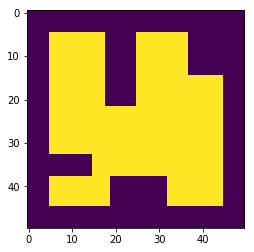

In [160]:
plt.imshow(images[0])
plt.show()

In [161]:
a,l = bestsplit(images[0])
s1,s2 = return_splits(images[0],a,l)

Shape of image: (50, 50)
0 1 0.02053098982225887 49 -1 -1 -1
0 2 0.041685789385141336 49 0 1 0.02053098982225887
0 3 0.06350535054183715 49 0 2 0.041685789385141336
0 4 0.08603499058806596 49 0 3 0.06350535054183715
0 5 0.10932506416638887 49 0 4 0.08603499058806596
0 6 0.07988109211641237 49 0 5 0.10932506416638887
0 7 0.0669290086894726 49 0 5 0.10932506416638887
0 8 0.05860407759640707 49 0 5 0.10932506416638887
0 9 0.0526876236634527 49 0 5 0.10932506416638887
0 10 0.048247636547014805 49 0 5 0.10932506416638887
0 11 0.044798281197717005 49 0 5 0.10932506416638887
0 12 0.04205471147846651 49 0 5 0.10932506416638887
0 13 0.03983671518586118 49 0 5 0.10932506416638887
0 14 0.038023983685505414 49 0 5 0.10932506416638887
0 15 0.03653294002515639 49 0 5 0.10932506416638887
0 16 0.030985934106489088 49 0 5 0.10932506416638887
0 17 0.026207994718679517 49 0 5 0.10932506416638887
0 18 0.022064119879002475 49 0 5 0.10932506416638887
0 19 0.018452757554163757 49 0 5 0.10932506416638887
0 20

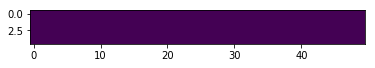

In [162]:
plt.imshow(s1)
plt.show()

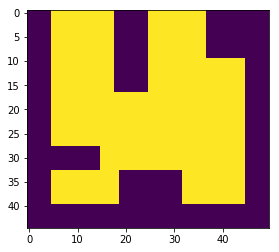

In [163]:
plt.imshow(s2)
plt.show()

In [164]:
a,l = bestsplit(s2)
s1,s2 = return_splits(s2,a,l)

Shape of image: (45, 50)
0 1 0.00023783331828830523 44 -1 -1 -1
0 2 0.0004868150273439342 44 0 1 0.00023783331828830523
0 3 0.0007477500556016814 44 0 2 0.0004868150273439342
0 4 0.001021522965128141 44 0 3 0.0007477500556016814
0 5 0.0013091080805028854 44 0 4 0.001021522965128141
0 6 0.0016115812091823667 44 0 5 0.0013091080805028854
0 7 0.001930133253961186 44 0 6 0.0016115812091823667
0 8 0.0022660860850445275 44 0 7 0.001930133253961186
0 9 0.0026209111235068194 44 0 8 0.0022660860850445275
0 10 0.0029962511945712533 44 0 9 0.0026209111235068194
0 11 0.0019493611782996911 44 0 10 0.0029962511945712533
0 12 0.0011794857211903098 44 0 10 0.0029962511945712533
0 13 0.0006321358726882886 44 0 10 0.0029962511945712533
0 14 0.0002695062870966547 44 0 10 0.0029962511945712533
0 15 6.502293853161145e-05 44 0 10 0.0029962511945712533
0 16 -1.1102230246251565e-16 44 0 10 0.0029962511945712533
0 17 6.152731897590691e-05 44 0 10 0.0029962511945712533
0 18 0.0006971976110784484 44 0 10 0.00299

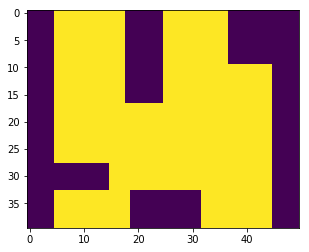

In [165]:
plt.imshow(s1)
plt.show()

In [166]:
a,l = bestsplit(s1)
s1,s2 = return_splits(s1,a,l)

Shape of image: (40, 50)
0 1 0.0012958051830080919 39 -1 -1 -1
0 2 0.002662460912263409 39 0 1 0.0012958051830080919
0 3 0.004106026485841241 39 0 2 0.002662460912263409
0 4 0.005633283164350522 39 0 3 0.004106026485841241
0 5 0.007251846763188685 39 0 4 0.005633283164350522
0 6 0.008970302356071436 39 0 5 0.007251846763188685
0 7 0.010798366417688388 39 0 6 0.008970302356071436
0 8 0.012747083279808114 39 0 7 0.010798366417688388
0 9 0.014829064855111262 39 0 8 0.012747083279808114
0 10 0.017058785413037514 39 0 9 0.014829064855111262
0 11 0.015362133191917704 39 0 10 0.017058785413037514
0 12 0.013946598965668744 39 0 10 0.017058785413037514
0 13 0.012748094366909712 39 0 10 0.017058785413037514
0 14 0.011720948128748576 39 0 10 0.017058785413037514
0 15 0.010831714656829305 39 0 10 0.017058785413037514
0 16 0.0100553436621994 39 0 10 0.017058785413037514
0 17 0.009372719561181797 39 0 10 0.017058785413037514
0 18 0.0066047803298973085 39 0 10 0.017058785413037514
0 19 0.004362267340

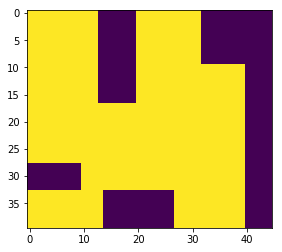

In [167]:
plt.imshow(s2)
plt.show()

In [168]:
a,l = bestsplit(s2)
s1,s2 = return_splits(s2,a,l)

Shape of image: (40, 45)
0 1 0.0017156159602598198 39 -1 -1 -1
0 2 0.0035286582025240154 39 0 1 0.0017156159602598198
0 3 0.005447844252237211 39 0 2 0.0035286582025240154
0 4 0.007482987391935758 39 0 3 0.005447844252237211
0 5 0.009645178592934456 39 0 4 0.007482987391935758
0 6 0.011947006863814669 39 0 5 0.009645178592934456
0 7 0.01440282807459703 39 0 6 0.011947006863814669
0 8 0.01702909552339482 39 0 7 0.01440282807459703
0 9 0.019844769950046692 39 0 8 0.01702909552339482
0 10 0.022871832929918456 39 0 9 0.019844769950046692
0 11 0.020673602573085037 39 0 10 0.022871832929918456
0 12 0.018829481681242877 39 0 10 0.022871832929918456
0 13 0.017260646537644808 39 0 10 0.022871832929918456
0 14 0.01591053461726366 39 0 10 0.022871832929918456
0 15 0.01473746835944545 39 0 10 0.022871832929918456
0 16 0.013710061189960543 39 0 10 0.022871832929918456
0 17 0.012804248305041455 39 0 10 0.022871832929918456
0 18 0.009038520748935186 39 0 10 0.022871832929918456
0 19 0.005977195786636

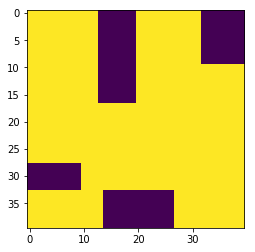

In [169]:
plt.imshow(s1)
plt.show()

In [182]:
a,l = bestsplit(s1)
s3,s4 = return_splits(s1,a,l)


Shape of image: (40, 40)
0 1 0.0025457068024926643 39 -1 -1 -1
0 2 0.0052473217741958456 39 0 1 0.0025457068024926643
0 3 0.00812016888069278 39 0 2 0.0052473217741958456
0 4 0.011181732602473793 39 0 3 0.00812016888069278
0 5 0.01445206963203749 39 0 4 0.011181732602473793
0 6 0.01795432279663456 39 0 5 0.01445206963203749
0 7 0.02171536947445374 39 0 6 0.01795432279663456
0 8 0.02576664949123597 39 0 7 0.02171536947445374
0 9 0.030145236381603713 39 0 8 0.02576664949123597
0 10 0.03489524463634719 39 0 9 0.030145236381603713
0 11 0.031764179495684886 39 0 10 0.03489524463634719
0 12 0.02911166623336947 39 0 10 0.03489524463634719
0 13 0.02683570276443159 39 0 10 0.03489524463634719
0 14 0.02486228147939018 39 0 10 0.03489524463634719
0 15 0.023136327164796633 39 0 10 0.03489524463634719
0 16 0.021615998600247655 39 0 10 0.03489524463634719
0 17 0.020268972988846112 39 0 10 0.03489524463634719
0 18 0.014347522852017347 39 0 10 0.03489524463634719
0 19 0.009506302005678258 39 0 10 0.03

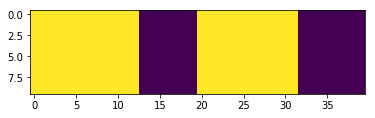

In [183]:
plt.imshow(s3)
plt.show()

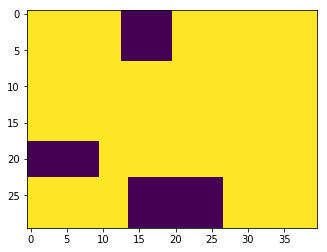

In [184]:
plt.imshow(s4)
plt.show()

In [186]:
a,l = bestsplit(s3)
a,l

Shape of image: (10, 40)
0 1 -1.1102230246251565e-16 9 -1 -1 -1
0 2 0.0 9 0 1 -1.1102230246251565e-16
0 3 0.0 9 0 2 0.0
0 4 0.0 9 0 2 0.0
0 5 0.0 9 0 2 0.0
0 6 0.0 9 0 2 0.0
0 7 0.0 9 0 2 0.0
0 8 0.0 9 0 2 0.0
1 1 0.01722831332016095 39 0 2 0.0
1 2 0.03503496323953559 39 1 1 0.01722831332016095
1 3 0.053461003321894296 39 1 2 0.03503496323953559
1 4 0.07255212193892735 39 1 3 0.053461003321894296
1 5 0.09235938389499487 39 1 4 0.07255212193892735
1 6 0.11294013010107418 39 1 5 0.09235938389499487
1 7 0.13435907845647588 39 1 6 0.11294013010107418
1 8 0.1566896838095535 39 1 7 0.13435907845647588
1 9 0.18001583572833113 39 1 8 0.1566896838095535
1 10 0.20443400292496494 39 1 9 0.18001583572833113
1 11 0.23005597753083107 39 1 10 0.20443400292496494
1 12 0.25701243923369155 39 1 11 0.23005597753083107
1 13 0.28545766253416494 39 1 12 0.25701243923369155
1 14 0.17727984474545688 39 1 13 0.28545766253416494
1 15 0.1177144779706244 39 1 13 0.28545766253416494
1 16 0.07594909887490653 39 1 1

(1, 32)